In [57]:
!unzip WeatherDataMunich1954-2022.zip

Archive:  WeatherDataMunich1954-2022.zip
replace weatherdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [150]:
import pandas as pd
from io import StringIO

weatherdata = pd.read_csv('weatherdata.csv', sep=";")

print(weatherdata.head())
print(weatherdata.info())

   STATIONS_ID  MESS_DATUM  QN_3     FX     FM  QN_4   RSK  RSKF    SDK  \
0         3379    19540601  -999 -999.0 -999.0     1   0.0     1 -999.0   
1         3379    19540602  -999 -999.0 -999.0     1   0.5     1 -999.0   
2         3379    19540603  -999 -999.0 -999.0     1   0.0     1 -999.0   
3         3379    19540604  -999 -999.0 -999.0     1   1.2     1 -999.0   
4         3379    19540605  -999 -999.0 -999.0     1   6.0     1 -999.0   

   SHK_TAG     NM    VPM     PM   TMK    UPM   TXK   TNK    TGK  eor  
0        0 -999.0 -999.0 -999.0  14.0 -999.0  17.6  10.4 -999.0  eor  
1        0 -999.0 -999.0 -999.0  13.2 -999.0  19.7   9.7 -999.0  eor  
2        0 -999.0 -999.0 -999.0  16.6 -999.0  21.9   8.2 -999.0  eor  
3        0 -999.0 -999.0 -999.0  15.2 -999.0  17.3  11.8 -999.0  eor  
4        0 -999.0 -999.0 -999.0  15.2 -999.0  17.7  13.7 -999.0  eor  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25051 entries, 0 to 25050
Data columns (total 19 columns):
 #   Column   

In [151]:
print(weatherdata.duplicated().sum())
weatherdata.drop_duplicates(inplace=True)

0


In [152]:
weatherdata.columns = weatherdata.columns.str.strip().str.lower().str.replace(' ', '_')
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25051 entries, 0 to 25050
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stations_id  25051 non-null  int64  
 1   mess_datum   25051 non-null  int64  
 2   qn_3         25051 non-null  int64  
 3   fx           25051 non-null  float64
 4   fm           25051 non-null  float64
 5   qn_4         25051 non-null  int64  
 6   rsk          25051 non-null  float64
 7   rskf         25051 non-null  int64  
 8   sdk          25051 non-null  float64
 9   shk_tag      25051 non-null  int64  
 10  nm           25051 non-null  float64
 11  vpm          25051 non-null  float64
 12  pm           25051 non-null  float64
 13  tmk          25051 non-null  float64
 14  upm          25051 non-null  float64
 15  txk          25051 non-null  float64
 16  tnk          25051 non-null  float64
 17  tgk          25051 non-null  float64
 18  eor          25051 non-null  object 
dtypes: f

In [153]:
from sklearn.preprocessing import MinMaxScaler
weatherdata[['fx','fm','sdk','nm','vpm','pm','upm','tgk']] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(weatherdata[['fx','fm','sdk','nm','vpm','pm','upm','tgk']])
weatherdata.head()

,stations_id,mess_datum,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk,eor
0,3379,19540601,-999,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,14.0,-1.0,17.6,10.4,-1.0,eor
1,3379,19540602,-999,-1.0,-1.0,1,0.5,1,-1.0,0,-1.0,-1.0,-1.0,13.2,-1.0,19.7,9.7,-1.0,eor
2,3379,19540603,-999,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,16.6,-1.0,21.9,8.2,-1.0,eor
3,3379,19540604,-999,-1.0,-1.0,1,1.2,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.3,11.8,-1.0,eor
4,3379,19540605,-999,-1.0,-1.0,1,6.0,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.7,13.7,-1.0,eor


In [154]:
import pandas as pd
weatherdata['mess_datum'] = pd.to_datetime(weatherdata['mess_datum'].astype(str), format='%Y%m%d')
weatherdata['mess_datum'] = weatherdata['mess_datum'].dt.strftime('%d-%m-%Y')
weatherdata.head()


,stations_id,mess_datum,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk,eor
0,3379,01-06-1954,-999,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,14.0,-1.0,17.6,10.4,-1.0,eor
1,3379,02-06-1954,-999,-1.0,-1.0,1,0.5,1,-1.0,0,-1.0,-1.0,-1.0,13.2,-1.0,19.7,9.7,-1.0,eor
2,3379,03-06-1954,-999,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,16.6,-1.0,21.9,8.2,-1.0,eor
3,3379,04-06-1954,-999,-1.0,-1.0,1,1.2,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.3,11.8,-1.0,eor
4,3379,05-06-1954,-999,-1.0,-1.0,1,6.0,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.7,13.7,-1.0,eor


In [155]:
weatherdata.tail()

,stations_id,mess_datum,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk,eor
25046,3379,27-12-2022,3,0.952005,0.983564,3,0.0,0,0.979961,0,0.994240,0.970603,0.985849,4.5,0.957834,7.0,1.2,0.955704,eor
25047,3379,28-12-2022,3,0.938897,0.983366,3,0.0,0,0.976117,0,0.998808,0.969819,0.979511,5.1,0.946096,9.5,0.6,0.954920,eor
25048,3379,29-12-2022,3,0.943909,0.984554,3,1.2,6,0.975757,0,0.999603,0.969623,0.973213,8.9,0.913248,13.5,5.1,0.963936,eor
25049,3379,30-12-2022,3,0.951234,0.983960,3,1.5,6,0.981045,0,0.996226,0.973738,0.975225,7.4,0.960564,12.7,4.3,0.961976,eor
25050,3379,31-12-2022,3,0.953932,0.984356,3,0.0,6,0.974639,0,0.999404,0.977462,0.978409,13.9,0.933885,20.0,10.5,0.972168,eor


In [156]:
weatherdata_clean = weatherdata.drop(columns=['stations_id'], inplace=True)
#weatherdata_clean.info()

In [157]:
print(weatherdata.columns)

Index(['mess_datum', 'qn_3', 'fx', 'fm', 'qn_4', 'rsk', 'rskf', 'sdk',
       'shk_tag', 'nm', 'vpm', 'pm', 'tmk', 'upm', 'txk', 'tnk', 'tgk', 'eor'],
      dtype='object')


In [158]:
aggregated_data = weatherdata.groupby('mess_datum').agg(average_temperature=('tgk', 'mean'),median_temperature=('tgk', 'median'))
print(aggregated_data)

            average_temperature  median_temperature
mess_datum                                         
01-01-1955            -1.000000           -1.000000
01-01-1956            -1.000000           -1.000000
01-01-1957            -1.000000           -1.000000
01-01-1958            -1.000000           -1.000000
01-01-1959            -1.000000           -1.000000
...                         ...                 ...
31-12-2018             0.960996            0.960996
31-12-2019             0.951980            0.951980
31-12-2020             0.949628            0.949628
31-12-2021             0.972756            0.972756
31-12-2022             0.972168            0.972168

[25051 rows x 2 columns]


In [159]:
mean_value = weatherdata[weatherdata['tgk'] != -999]['tgk'].mean()
weatherdata['tgk'] = weatherdata['tgk'].replace(-999, mean_value)

print(weatherdata)

       mess_datum  qn_3        fx        fm  qn_4  rsk  rskf       sdk  \
0      01-06-1954  -999 -1.000000 -1.000000     1  0.0     1 -1.000000   
1      02-06-1954  -999 -1.000000 -1.000000     1  0.5     1 -1.000000   
2      03-06-1954  -999 -1.000000 -1.000000     1  0.0     1 -1.000000   
3      04-06-1954  -999 -1.000000 -1.000000     1  1.2     1 -1.000000   
4      05-06-1954  -999 -1.000000 -1.000000     1  6.0     1 -1.000000   
...           ...   ...       ...       ...   ...  ...   ...       ...   
25046  27-12-2022     3  0.952005  0.983564     3  0.0     0  0.979961   
25047  28-12-2022     3  0.938897  0.983366     3  0.0     0  0.976117   
25048  29-12-2022     3  0.943909  0.984554     3  1.2     6  0.975757   
25049  30-12-2022     3  0.951234  0.983960     3  1.5     6  0.981045   
25050  31-12-2022     3  0.953932  0.984356     3  0.0     6  0.974639   

       shk_tag        nm       vpm        pm   tmk       upm   txk   tnk  \
0            0 -1.000000 -1.000000 

In [160]:
mean_value = weatherdata[weatherdata[['qn_3','fx','sdk','nm','vpm','pm','upm','fm']] != -999][['qn_3','fx','sdk','nm','vpm','pm','upm','fm']].mean()
weatherdata[['qn_3','fx','sdk','nm','vpm','pm','upm','fm']] = weatherdata[['qn_3','fx','sdk','nm','vpm','pm','upm','fm']].replace(-999, mean_value)
weatherdata = weatherdata.round(3)
print(weatherdata)

       mess_datum   qn_3     fx     fm  qn_4  rsk  rskf    sdk  shk_tag  \
0      01-06-1954  9.846 -1.000 -1.000     1  0.0     1 -1.000        0   
1      02-06-1954  9.846 -1.000 -1.000     1  0.5     1 -1.000        0   
2      03-06-1954  9.846 -1.000 -1.000     1  0.0     1 -1.000        0   
3      04-06-1954  9.846 -1.000 -1.000     1  1.2     1 -1.000        0   
4      05-06-1954  9.846 -1.000 -1.000     1  6.0     1 -1.000        0   
...           ...    ...    ...    ...   ...  ...   ...    ...      ...   
25046  27-12-2022  3.000  0.952  0.984     3  0.0     0  0.980        0   
25047  28-12-2022  3.000  0.939  0.983     3  0.0     0  0.976        0   
25048  29-12-2022  3.000  0.944  0.985     3  1.2     6  0.976        0   
25049  30-12-2022  3.000  0.951  0.984     3  1.5     6  0.981        0   
25050  31-12-2022  3.000  0.954  0.984     3  0.0     6  0.975        0   

          nm    vpm     pm   tmk    upm   txk   tnk    tgk  eor  
0     -1.000 -1.000 -1.000  14.0 

In [161]:
weatherdata.info()
weatherdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25051 entries, 0 to 25050
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mess_datum  25051 non-null  object 
 1   qn_3        25051 non-null  float64
 2   fx          25051 non-null  float64
 3   fm          25051 non-null  float64
 4   qn_4        25051 non-null  int64  
 5   rsk         25051 non-null  float64
 6   rskf        25051 non-null  int64  
 7   sdk         25051 non-null  float64
 8   shk_tag     25051 non-null  int64  
 9   nm          25051 non-null  float64
 10  vpm         25051 non-null  float64
 11  pm          25051 non-null  float64
 12  tmk         25051 non-null  float64
 13  upm         25051 non-null  float64
 14  txk         25051 non-null  float64
 15  tnk         25051 non-null  float64
 16  tgk         25051 non-null  float64
 17  eor         25051 non-null  object 
dtypes: float64(13), int64(3), object(2)
memory usage: 3.4+ MB


,mess_datum,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk,eor
0,01-06-1954,9.846,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,14.0,-1.0,17.6,10.4,-1.0,eor
1,02-06-1954,9.846,-1.0,-1.0,1,0.5,1,-1.0,0,-1.0,-1.0,-1.0,13.2,-1.0,19.7,9.7,-1.0,eor
2,03-06-1954,9.846,-1.0,-1.0,1,0.0,1,-1.0,0,-1.0,-1.0,-1.0,16.6,-1.0,21.9,8.2,-1.0,eor
3,04-06-1954,9.846,-1.0,-1.0,1,1.2,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.3,11.8,-1.0,eor
4,05-06-1954,9.846,-1.0,-1.0,1,6.0,1,-1.0,0,-1.0,-1.0,-1.0,15.2,-1.0,17.7,13.7,-1.0,eor


In [162]:
avg_temp_by_date = weatherdata.groupby('mess_datum')['tgk'].mean().reset_index()

print(avg_temp_by_date)

       mess_datum    tgk
0      01-01-1955 -1.000
1      01-01-1956 -1.000
2      01-01-1957 -1.000
3      01-01-1958 -1.000
4      01-01-1959 -1.000
...           ...    ...
25046  31-12-2018  0.961
25047  31-12-2019  0.952
25048  31-12-2020  0.950
25049  31-12-2021  0.973
25050  31-12-2022  0.972

[25051 rows x 2 columns]


In [163]:
weatherdata['mess_datum'] = pd.to_datetime(weatherdata['mess_datum'], format='mixed')
weatherdata['year'] = weatherdata['mess_datum'].dt.to_period('Y')
avg_temp_by_year = weatherdata.groupby('year')['tgk'].mean().reset_index()

print(avg_temp_by_year)

    year       tgk
0   1954 -1.000000
1   1955 -1.000000
2   1956 -1.000000
3   1957 -1.000000
4   1958 -1.000000
..   ...       ...
64  2018  0.968833
65  2019  0.967808
66  2020  0.967877
67  2021  0.966652
68  2022  0.968951

[69 rows x 2 columns]


In [147]:
weatherdata['tgk'] = weatherdata['tgk'].replace(4.923000, 0)

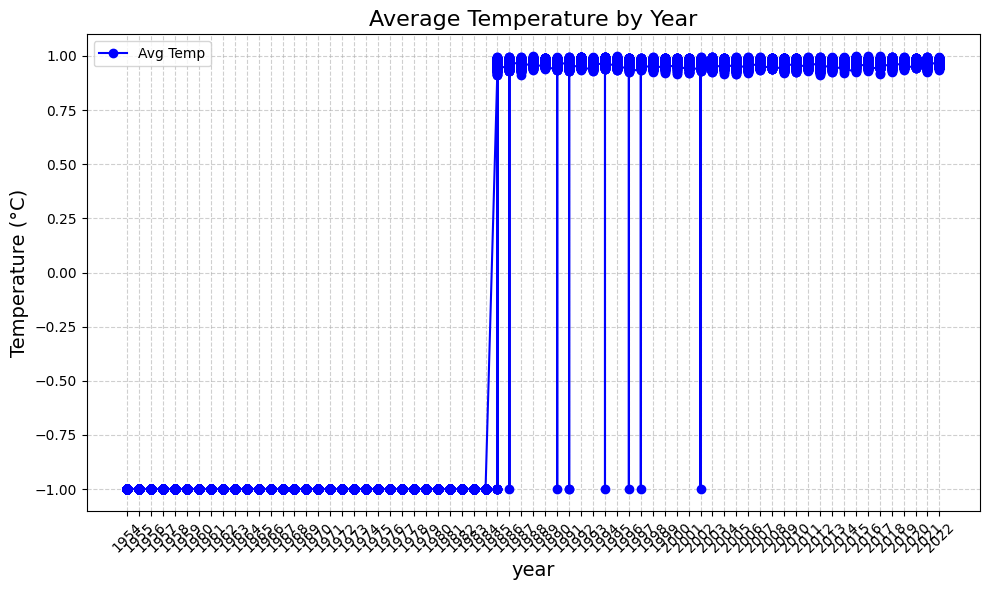

In [164]:
import matplotlib.pyplot as plt
filtered = weatherdata[weatherdata['tgk'] != 0]
plt.figure(figsize=(10, 6))
filtered['year'] = filtered['year'].astype(str)
plt.plot(filtered['year'], filtered['tgk'], marker='o', linestyle='-', color='b', label='Avg Temp')

plt.title('Average Temperature by Year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()